In [8]:
exec(open("objet.py").read(), globals())

'\n################## color by param1\n\n#fig = plt.figure(figsize= (16, 16))\n#ax = fig.add_subplot(1, 1, 1, projection=\'3d\')\n#plt.title("N density")\n#plt.xlabel("time")\n#plt.ylabel("a")\n#\n#Color = [\'b\', \'g\', \'r\', \'c\', \'m\', \'y\', \'k\']#, \'w\']\n#for l in range(Number_of_simulation):\n#    for i, param1 in enumerate(Param1):\n#        ax.plot_wireframe(X[:,i], Y[:,i], NN_T[l,i,:], rstride=1, cstride=0, color = Color[i%len(Color)])\n\n'

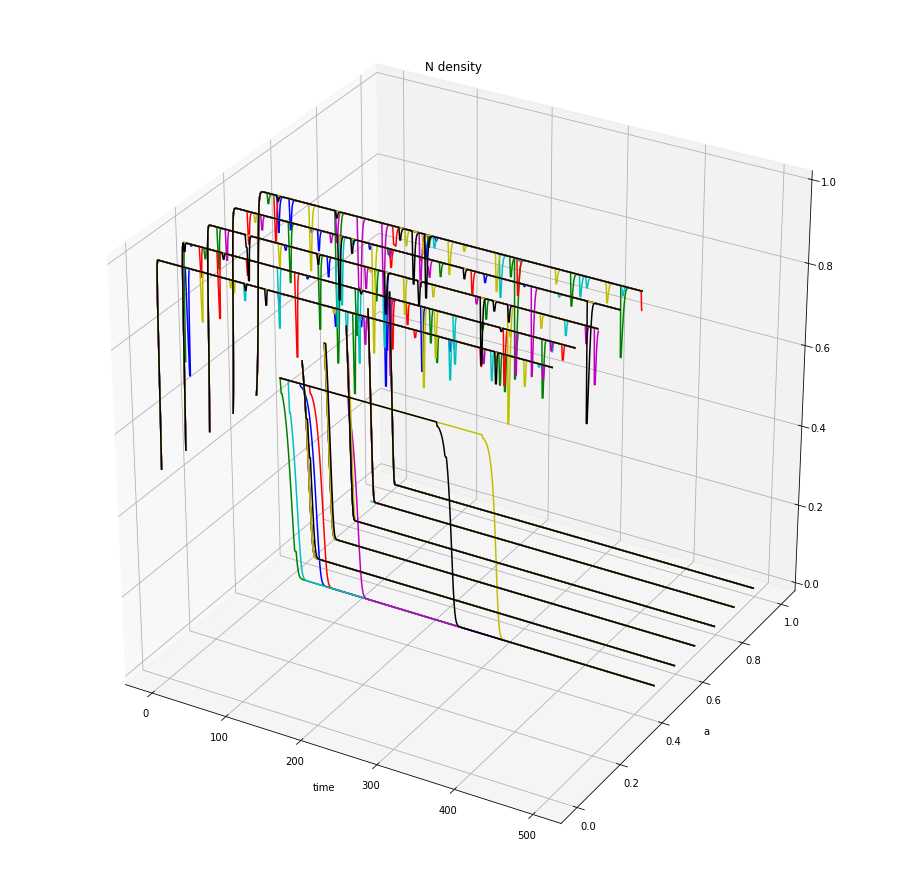

In [9]:
Param1 = np.linspace(0, 1, 11)
Number_of_simulation = 7

NN_T = np.zeros((Number_of_simulation, len(Param1), 500))
WW_T = np.zeros_like(NN_T)

Init = [0.5, 0.5]
param2 = 0.5
for l in range(Number_of_simulation):
    for i, param1 in enumerate(Param1):
        O = Ode(model = "allee_effect_adi", Init = Init, Param_phy=[param1, param2], finalTime = 500)
        #O.perturbation("neg_poisson", param=[0.2, 0.2])
        O.perturbation()
        Y = O.solve_by_part()
        NN_T[l, i,:] = Y[0]
        WW_T[l, i,:] = Y[1]


#fig, [ax1, ax2] = plt.subplots(figsize = (16, 16), ncols = 2, nrows=2)

fig = plt.figure(figsize= (16, 16))

ax = fig.add_subplot(1, 1, 1, projection='3d')
X, Y = np.meshgrid(O.Time, Param1)
plt.title("N density")
plt.xlabel("time")
plt.ylabel("a")

################ color by simulation

Color = ['b', 'g', 'r', 'c', 'm', 'y', 'k']#, 'w']
for l in range(Number_of_simulation):
    ax.plot_wireframe(X, Y, NN_T[l,:,:], rstride=1, cstride=0, color = Color[l])

"""
################## color by param1

#fig = plt.figure(figsize= (16, 16))
#ax = fig.add_subplot(1, 1, 1, projection='3d')
#plt.title("N density")
#plt.xlabel("time")
#plt.ylabel("a")
#
#Color = ['b', 'g', 'r', 'c', 'm', 'y', 'k']#, 'w']
#for l in range(Number_of_simulation):
#    for i, param1 in enumerate(Param1):
#        ax.plot_wireframe(X[:,i], Y[:,i], NN_T[l,i,:], rstride=1, cstride=0, color = Color[i%len(Color)])

"""